In [ ]:
# lets open BES wave 14!

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [3]:
dataset_name = "W14_comb"

In [5]:
# dataset_name = "W14_only"
# data_subfolder = BES_data_folder + dataset_name + os.sep
# dataset_filename = "BES2017_W14_v0.3.dta"
# BES_Panel  = pd.read_stata(data_subfolder + dataset_filename)
# print("BES_Panel", BES_Panel.shape )


In [6]:
# dataset_name = "W14_only"
# data_subfolder = BES_data_folder + dataset_name + os.sep
# BES_Panel.to_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))

In [7]:
# dataset_name = "W14_comb"
# data_subfolder = BES_data_folder + dataset_name + os.sep
# dataset_filename = "BES2017_W14_Panel_v0.3.dta"
# BES_Panel2  = pd.read_stata(data_subfolder + dataset_filename)
# print("BES_Panel2", BES_Panel2.shape )
# BES_Panel2.to_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))

In [8]:
# BES_Panel2.to_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))

In [4]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
print("BES_Panel", BES_Panel.shape )

####

# BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
# print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

# fname = data_subfolder + "cat_dictionary.pkl"
# with open(fname, "rb") as f:
#     cat_dictionary = pickle.load( f )
    
# ####

# # BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
# # print("BES_non_numeric",  BES_non_numeric.shape )

# BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
# print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_msgpack( data_subfolder + "BES_reduced_with_na.msgpack")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

# fname = data_subfolder + "new_old_col_names.pkl"
# with open(fname, "rb") as f:
#     new_old_col_names = pickle.load(f) 

BES_Panel (73703, 5692)
var_type (5692, 13)
BES_reduced_with_na (73703, 7812)
Wall time: 16.1 s


In [5]:
var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )


var_type (5692, 13)


In [14]:
euIDcols = [x for x in BES_Panel.columns if "euID" in x]
euIDcols

In [5]:
output_subfolder = BES_output_folder +  os.sep + "randomFunPlots"
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )


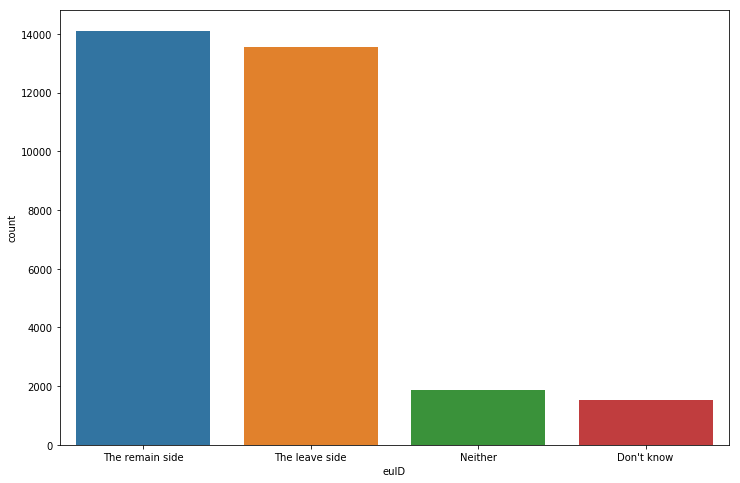

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(BES_Panel["euID"]);
plt.savefig(output_subfolder +  os.sep + "euID" + ".png", bbox_inches='tight')

In [13]:
euIDs = [x for x in BES_Panel.columns if re.match("euID\d", x)]
euIDs

['euID1', 'euID2', 'euID3', 'euID4', 'euID6', 'euID7']

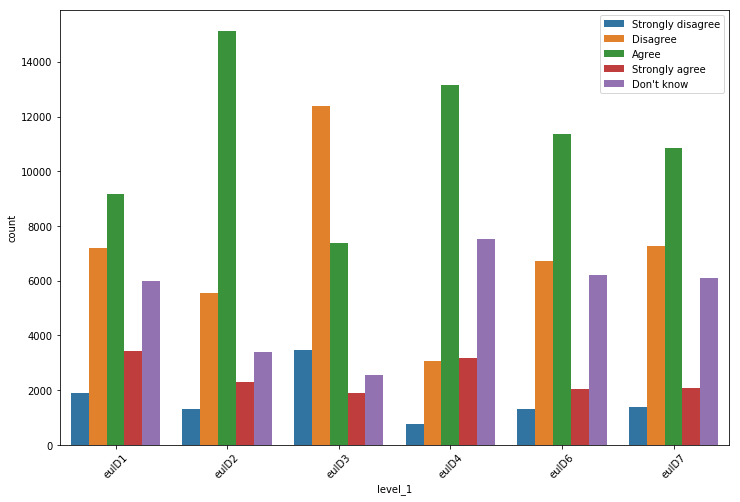

In [14]:
plt.figure(figsize=(12,8))
euID_for_plot = BES_Panel[euIDs].apply(lambda x: x.cat.codes).replace(-1, np.nan).stack().reset_index().drop("level_0",axis=1)
euID_for_plot = BES_Panel[euIDs].stack().reset_index().drop("level_0",axis=1)
euID_for_plot[0] = euID_for_plot[0].astype('category').cat.set_categories(BES_Panel[euIDs[0]].cat.categories)
sns.countplot(data = euID_for_plot, x = "level_1",hue=0);
plt.xticks(rotation=45);
plt.savefig(output_subfolder +  os.sep + "euID_subquestions" + ".png", bbox_inches='tight')

In [15]:
pIDs = [x for x in BES_Panel.columns if re.match("pid", x)]
pIDs

['pidWeThey',
 'pidInterestedOthers',
 'pidCriticiseParty',
 'pidCommonParty',
 'pidRuinDay',
 'pidConnected',
 'pidMyParty',
 'pidPraiseGood']

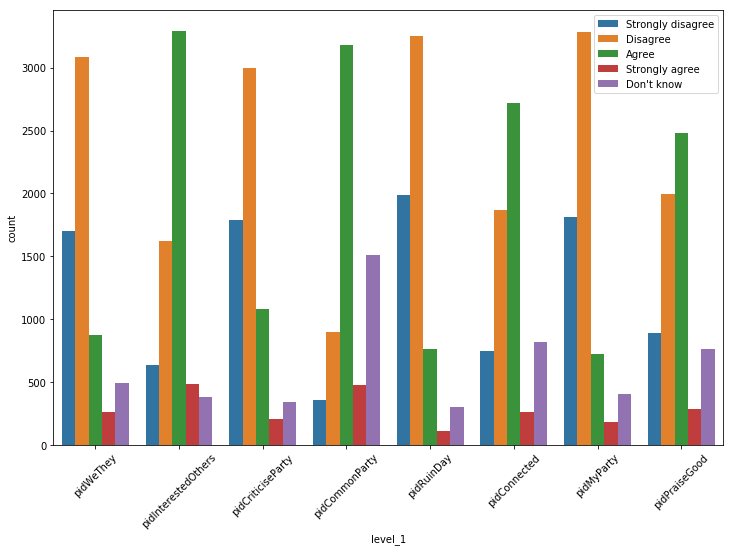

In [16]:
plt.figure(figsize=(12,8))
euID_for_plot = BES_Panel[pIDs].apply(lambda x: x.cat.codes).replace(-1, np.nan).stack().reset_index().drop("level_0",axis=1)
euID_for_plot = BES_Panel[pIDs].stack().reset_index().drop("level_0",axis=1)
euID_for_plot[0] = euID_for_plot[0].astype('category').cat.set_categories(BES_Panel[pIDs[0]].cat.categories)
sns.countplot(data = euID_for_plot, x = "level_1",hue=0);
plt.xticks(rotation=45);
plt.savefig(output_subfolder + os.sep + "partyID_subquestions" + ".png", bbox_inches='tight')

In [19]:
partyId = [x for x in BES_Panel.columns if re.match("partyId", x)]
partyId

['partyIdStrength', 'partyId', 'partyIdSqueeze']

In [20]:
BES_Panel[partyId]

,partyIdStrength,partyId,partyIdSqueeze
0,Fairly strong,Conservative,NaN
1,Not very strong,Liberal Democrat,NaN
2,Fairly strong,Labour,NaN
3,Not very strong,Conservative,NaN
4,NaN,No - none,No - none
5,Fairly strong,Other,NaN
6,Very strong,Labour,NaN
7,Not very strong,No - none,Green Party
8,Not very strong,Conservative,NaN
9,Not very strong,Labour,NaN


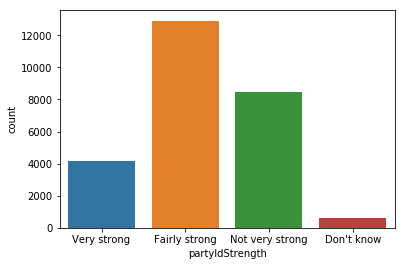

In [23]:
sns.countplot(BES_Panel["partyIdStrength"]);

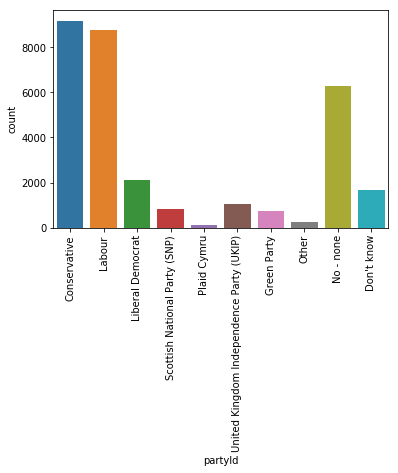

In [26]:
sns.countplot(BES_Panel["partyId"]);
plt.xticks(rotation =90);

In [ ]:
# over wave comparison?
# - test with everything first
# - summarise with SA/A - SD/D
# - party/neither-none/dk




In [10]:
partyId = [x for x in BES_Panel.columns if re.match("partyIdW", x)]
partyId

['partyIdW1',
 'partyIdW2',
 'partyIdW3',
 'partyIdW4',
 'partyIdW6',
 'partyIdW7',
 'partyIdW8',
 'partyIdW9',
 'partyIdW10',
 'partyIdW11',
 'partyIdW12',
 'partyIdW13',
 'partyIdW14']

In [11]:
BES_Panel[partyId]

,partyIdW1,partyIdW2,partyIdW3,partyIdW4,partyIdW6,partyIdW7,partyIdW8,partyIdW9,partyIdW10,partyIdW11,partyIdW12,partyIdW13,partyIdW14
0,Labour,United Kingdom Independence Party (UKIP),NaN,Labour,Labour,Labour,Labour,Labour,United Kingdom Independence Party (UKIP),NaN,NaN,NaN,NaN
1,Conservative,NaN,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative
2,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,NaN,NaN,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat
3,Conservative,Conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Conservative,Conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Labour,Labour,Labour,Labour,Labour,Labour,NaN,NaN,NaN,Labour,NaN,Labour,NaN
6,Labour,Other,NaN,Other,Scottish National Party (SNP),Scottish National Party (SNP),Scottish National Party (SNP),NaN,Labour,Labour,Labour,Labour,Labour
7,United Kingdom Independence Party (UKIP),Conservative,United Kingdom Independence Party (UKIP),Conservative,Conservative,Conservative,NaN,NaN,Conservative,Conservative,Conservative,Conservative,Conservative
8,Labour,Labour,Labour,Labour,Labour,No - none,No - none,Labour,Labour,Labour,Labour,Labour,No - none
9,Conservative,Conservative,Conservative,NaN,Conservative,Conservative,NaN,Conservative,NaN,NaN,Conservative,NaN,NaN


In [12]:
BES_Panel[partyId[0]].cat.categories

Index(['Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru',
       'United Kingdom Independence Party (UKIP)', 'Green Party',
       'British National Party (BNP)', 'Other', 'No - none', 'Don't know'],
      dtype='object')

In [13]:
party_cats = []
for col_num in range(0,len(partyId)):
    party_cats.extend(list(BES_Panel[partyId[col_num]].cat.categories))
    
party_cats = list(set(party_cats))
for col_num in range(0,len(partyId)):
    BES_Panel[partyId[col_num]] = BES_Panel[partyId[col_num]].cat.set_categories(party_cats)


In [14]:
BES_Panel[partyId]

,partyIdW1,partyIdW2,partyIdW3,partyIdW4,partyIdW6,partyIdW7,partyIdW8,partyIdW9,partyIdW10,partyIdW11,partyIdW12,partyIdW13,partyIdW14
0,Labour,United Kingdom Independence Party (UKIP),NaN,Labour,Labour,Labour,Labour,Labour,United Kingdom Independence Party (UKIP),NaN,NaN,NaN,NaN
1,Conservative,NaN,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative
2,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,NaN,NaN,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat
3,Conservative,Conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Conservative,Conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Labour,Labour,Labour,Labour,Labour,Labour,NaN,NaN,NaN,Labour,NaN,Labour,NaN
6,Labour,Other,NaN,Other,Scottish National Party (SNP),Scottish National Party (SNP),Scottish National Party (SNP),NaN,Labour,Labour,Labour,Labour,Labour
7,United Kingdom Independence Party (UKIP),Conservative,United Kingdom Independence Party (UKIP),Conservative,Conservative,Conservative,NaN,NaN,Conservative,Conservative,Conservative,Conservative,Conservative
8,Labour,Labour,Labour,Labour,Labour,No - none,No - none,Labour,Labour,Labour,Labour,Labour,No - none
9,Conservative,Conservative,Conservative,NaN,Conservative,Conservative,NaN,Conservative,NaN,NaN,Conservative,NaN,NaN


In [15]:
wave_list = [re.search("(W\d+)",x).groups()[0] for x in partyId]
wave_list

['W1',
 'W2',
 'W3',
 'W4',
 'W6',
 'W7',
 'W8',
 'W9',
 'W10',
 'W11',
 'W12',
 'W13',
 'W14']

In [16]:
wt_wave_list = []
for wave in wave_list:
    wt_new = "wt_new_"+wave
    wt_old = "wt_full_"+wave
    if wt_new in BES_Panel.columns:
        wt = BES_Panel[wt_new]
        wt_wave_list.append(wt_new)
    else:
        wt = BES_Panel[wt_old]
        wt_wave_list.append(wt_old)
wt_wave_list

['wt_full_W1',
 'wt_full_W2',
 'wt_full_W3',
 'wt_full_W4',
 'wt_new_W6',
 'wt_new_W7',
 'wt_new_W8',
 'wt_new_W9',
 'wt_new_W10',
 'wt_new_W11',
 'wt_new_W12',
 'wt_new_W13',
 'wt_new_W14']

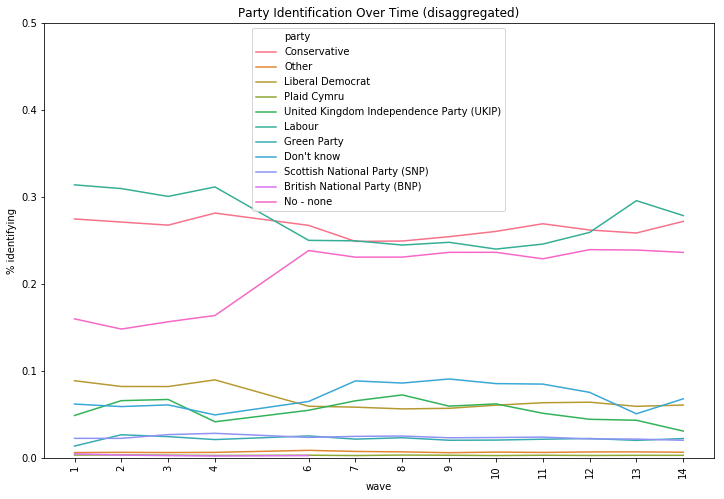

In [36]:
test_df = pd.DataFrame(columns = partyId)
for pos in range(0,len(partyId)):
    
    test = pd.crosstab( index = np.ones( len(BES_Panel[partyId[pos]]) ) ,
                 columns = BES_Panel[partyId[pos]] ,
                 values = BES_Panel[wt_wave_list[pos]], aggfunc = sum, normalize='index' ).loc[1.0]
    test_df[partyId[pos]] = test
test_df = test_df.stack().reset_index()
test_df.columns = ["party","wave","percentage"]
# test_df["wave"] = test_df["wave"].apply(lambda x: re.search("(W\d+)",x).groups()[0])
test_df["wave"] = test_df["wave"].apply(lambda x: int(re.search("W(\d+)",x).groups()[0]))
# test_df["wave"] = test_df["wave"].astype('category').cat.set_categories(wave_list, ordered=True)
plt.figure(figsize=(12,8));
sns.lineplot(data = test_df, hue = "party", x = "wave", y="percentage");
plt.xticks([1,2,3,4,6,7,8,9,10,11,12,13,14],rotation = 90);
plt.ylim([0,.5]);
plt.ylabel("% identifying");
plt.title("Party Identification Over Time (disaggregated)");
plt.savefig(output_subfolder + os.sep+ "UK Party ID (disaggregated)" + ".png", bbox_inches='tight')


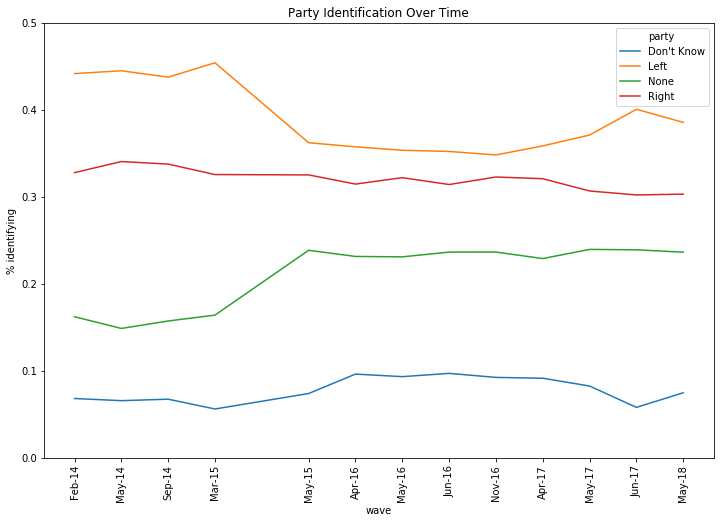

In [37]:
test_df = pd.DataFrame(columns = partyId)
coal_party = {"Left":["Labour","Liberal Democrat", "Scottish National Party (SNP)", "Plaid Cymru", "Green Party"],
              "Right":["Conservative","United Kingdom Independence Party (UKIP)", "British National Party (BNP)"],
              "Don't Know":["Don't know","Other"],
              "None":["No-none"]}
party_coal = {"Labour":"Left", "Liberal Democrat":"Left","Scottish National Party (SNP)":"Left",
              "Plaid Cymru":"Left","Green Party":"Left","Conservative":"Right","United Kingdom Independence Party (UKIP)":"Right",
              "British National Party (BNP)":"Right","Don't know":"Don't Know", "Other": "Don't Know", 'No - none':"None"}

for pos in range(0,len(partyId)):
    
    test = pd.crosstab( index = np.ones( len(BES_Panel[partyId[pos]]) ) ,
                 columns = BES_Panel[partyId[pos]].apply(lambda x: party_coal[x]), 
                 values = BES_Panel[wt_wave_list[pos]], aggfunc = sum, normalize='index' ).loc[1.0]
    test_df[partyId[pos]] = test
test_df = test_df.stack().reset_index()
test_df.columns = ["party","wave","percentage"]
# test_df["wave"] = test_df["wave"].apply(lambda x: re.search("(W\d+)",x).groups()[0])
test_df["wave"] = test_df["wave"].apply(lambda x: int(re.search("W(\d+)",x).groups()[0]))
# test_df["wave"] = test_df["wave"].astype('category').cat.set_categories(wave_list, ordered=True)
plt.figure(figsize=(12,8));
sns.lineplot(data = test_df, hue = "party", x = "wave", y="percentage");
waves = [1,2,3,4,6,7,8,9,10,11,12,13,14]
plt.xticks(waves,[waves_to_dates[x] for x in waves],rotation = 90);
plt.ylim([0,.5]);
plt.ylabel("% identifying");
plt.title("Party Identification Over Time");

plt.savefig(output_subfolder + os.sep+ "UK Party ID" + ".png", bbox_inches='tight')

# test_df_red = test_df.copy()
# test_df_red["party"] = test_df_red["party"].cat.set_categories(["Left","Right","Don't Know", "None"])
# for left_party in ["Labour","Liberal Democrat", "Scottish National Party (SNP)", "Plaid Cymru", "Green Party"]:
#     test_df_red.loc[ test_df["party"] == left_party  , "party"] = "Left"
# for right_party in ["Conservative","United Kingdom Independence Party (UKIP)", "British National Party (BNP)"]:
#     test_df_red.loc[ test_df["party"] == right_party , "party"] = "Right"
# for dk_party in ["Don't know","Other"]:
#     test_df_red.loc[ test_df["party"] == dk_party    , "party"] = "Don't Know"
# for dk_party in ["No-none"]:
#     test_df_red.loc[ test_df["party"] == dk_party    , "party"] = "None"
# test_df
# plt.figure(figsize=(12,8));
# sns.lineplot(data = test_df_red, hue = "party", x = "wave", y="percentage");
# plt.xticks([1,2,3,4,6,7,8,9,10,11,12,13,14],rotation = 90);

In [ ]:
{k:v for k,v in coal_party.items()}

In [ ]:
euIDcols = [x for x in BES_Panel.columns if "euIDW" in x]
euIDcols

In [20]:
waves_to_dates = BES_file_manifest[ BES_file_manifest["Only_or_Combined"]=="Only" ][["Wave No","Date_Start"]].set_index("Wave No").to_dict()['Date_Start']

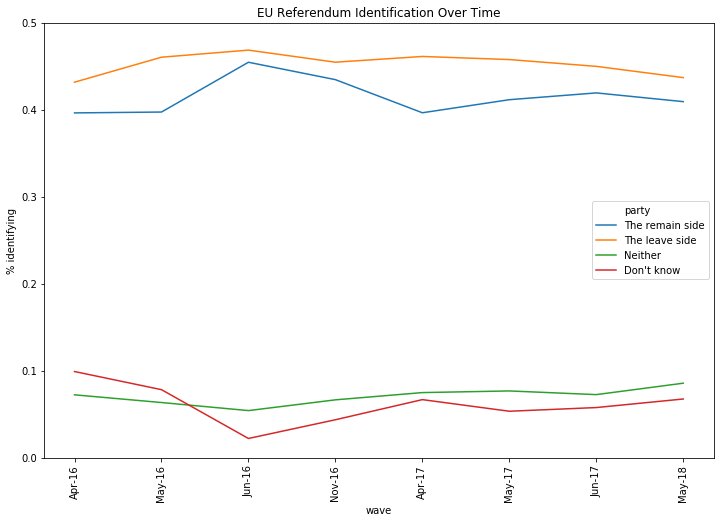

In [30]:
euId = [x for x in BES_Panel.columns if re.match("euIDW", x)]
wave_list = [re.search("(W\d+)",x).groups()[0] for x in euId]
test_df = pd.DataFrame(columns = euId)
for pos in range(0,len(euId)):
    
    test = pd.crosstab( index = np.ones( len(BES_Panel[euId[pos]]) ) ,
                 columns = BES_Panel[euId[pos]] ,
                 values = BES_Panel[wt_wave_list[pos]], aggfunc = sum, normalize='index' ).loc[1.0]
    test_df[euId[pos]] = test
test_df = test_df.stack().reset_index()
test_df.columns = ["party","wave","percentage"]
test_df["wave"] = test_df["wave"].apply(lambda x: int(re.search("W(\d+)",x).groups()[0]))

plt.figure(figsize=(12,8));
sns.lineplot(data = test_df, hue = "party", x = "wave", y="percentage");
plt.xticks([7,8,9,10,11,12,13,14],[waves_to_dates[x] for x in [7,8,9,10,11,12,13,14]],rotation = 90);
plt.ylim([0,.5]);
plt.title("EU Referendum Identification Over Time");
plt.ylabel("% identifying");
plt.savefig(output_subfolder + os.sep+ "UK euRef party ID" + ".png", bbox_inches='tight')

In [ ]:
############################################

# Who are these people who 



In [11]:
BES_Panel[[x for x in BES_Panel.columns if "newspaper" in x]].notnull().sum()

newspaperW12            34394
profile_newspaperW10    30237
profile_newspaperW11    30956
profile_newspaperW13    31136
profile_newspaper       56589
dtype: int64

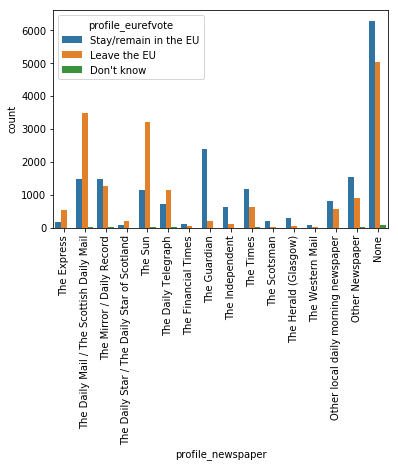

In [17]:
sns.countplot(data=BES_Panel, x="profile_newspaper",hue="profile_eurefvote");
plt.xticks(rotation=90);
plt.savefig(output_subfolder +  os.sep + "newspapers_by_eurefVote" + ".png", bbox_inches='tight')

In [37]:
[x for x in BES_reduced_with_na.columns if "lr" in x]

['lrConW2__Right',
 'lrLabW2__Right',
 'lrLDW2__Right',
 'lrUKIPW2__Right',
 'lrSNPW2__Right',
 'lrPCW2__Right',
 'lrgreensW2__Right',
 'lrConW3__Right',
 'lrLabW3__Right',
 'lrLDW3__Right',
 'lrUKIPW3__Right',
 'lrSNPW3__Right',
 'lrPCW3__Right',
 'lrgreensW3__Right',
 'lrConW4__Right',
 'lrLabW4__Right',
 'lrLDW4__Right',
 'lrUKIPW4__Right',
 'lrSNPW4__Right',
 'lrPCW4__Right',
 'lrgreensW4__Right',
 'lrConW5__Right',
 'lrLabW5__Right',
 'lrLDW5__Right',
 'lrUKIPW5__Right',
 'lrSNPW5__Right',
 'lrPCW5__Right',
 'lrgreensW5__Right',
 'lrConW6__Right',
 'lrLabW6__Right',
 'lrLDW6__Right',
 'lrUKIPW6__Right',
 'lrSNPW6__Right',
 'lrPCW6__Right',
 'lrgreensW6__Right',
 'lr1W6__Strongly agree',
 'lr2W6__Strongly agree',
 'lr3W6__Strongly agree',
 'lr4W6__Strongly agree',
 'lr5W6__Strongly agree',
 'lrConW7__Right',
 'lrLabW7__Right',
 'lrLDW7__Right',
 'lrUKIPW7__Right',
 'lrSNPW7__Right',
 'lrPCW7__Right',
 'lrgreensW7__Right',
 'lrCameronW7__Right',
 'lrCorbynW7__Right',
 'lrConW8__Righ

In [20]:
al_corrs = BES_reduced_with_na.corrwith( BES_reduced_with_na['al_scaleW14__Authoritarian'] )

In [63]:
al_corrs.drop([x for x in al_corrs.index if re.match("al(\d+|_)|immig",x)]).sort_values()

euLeaveBigBusinessW14__Much more likely                                                                     -0.403819
europeannessW14__Very strongly European                                                                     -0.369806
euRefDoOverW14_Yes                                                                                          -0.364047
welfarePreferenceW14__Much too low                                                                          -0.356714
asylumMoreW13__Many more                                                                                    -0.335194
likeCorbynW14__Strongly like                                                                                -0.333430
effectsEUUnemploymentW14__Much higher                                                                       -0.331137
edlevelW14__Postgrad                                                                                        -0.322435
natSecuritySelfW13__Protect civil liberties             

In [70]:

BES_reduced_with_na[var_type[var_type["type"]==0].index].corrwith( BES_reduced_with_na['al_scaleW14__Authoritarian'] )


riskScaleW8                     -0.028474
personality_agreeableness        0.036290
personality_conscientiousness    0.049434
personality_extraversion         0.006346
personality_neuroticism         -0.006892
personality_openness            -0.052274
cogempathyIRTW14                -0.008005
affempathyIRTW14                -0.022104
zeroSumIRTW14                   -0.072695
dtype: float64

In [73]:
BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if "zeroSum" in x]].corrwith( BES_reduced_with_na['al_scaleW14__Authoritarian'] ).sort_values()

zeroSumIRTW14                  -0.072695
zeroSum11W14__Strongly agree   -0.009353
zeroSum9W14__Strongly agree     0.001144
zeroSum7W14__Strongly agree     0.023983
zeroSum5W14__Strongly agree     0.041173
zeroSum1W14__Strongly agree     0.085605
zeroSum4W14__Strongly agree     0.162951
dtype: float64

In [74]:
BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if "zeroSum" in x]].corrwith( BES_reduced_with_na['lr_scaleW14__Right'] ).sort_values()

zeroSum9W14__Strongly agree    -0.075985
zeroSum1W14__Strongly agree    -0.050644
zeroSumIRTW14                  -0.012649
zeroSum7W14__Strongly agree    -0.010678
zeroSum4W14__Strongly agree    -0.004063
zeroSum11W14__Strongly agree   -0.002378
zeroSum5W14__Strongly agree     0.017202
dtype: float64

In [ ]:
############################

In [21]:
[x for x in BES_Panel.columns if "edlevel" in x]

['edlevelW1_W6',
 'edlevelW7',
 'edlevelW8W9W10',
 'edlevelW11',
 'edlevelW12',
 'edlevelW13',
 'edlevelW14']

In [23]:
BES_Panel['edlevelW14'].cat.categories

Index(['No qualifications', 'Below GCSE', 'GCSE', 'A-level', 'Undergraduate',
       'Postgrad'],
      dtype='object')

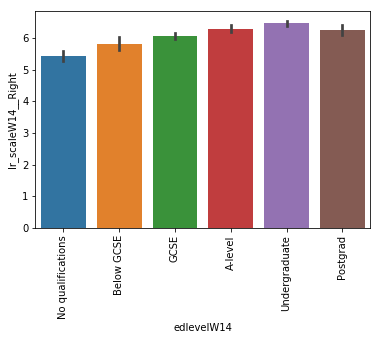

In [36]:
# sns.catplot(data=BES_Panel, x='edlevelW14', hue="profile_eurefvote");
# BES_reduced_with_na['al_scaleW14__Authoritarian']
sns.barplot(x=BES_Panel['edlevelW14'], y=BES_reduced_with_na['lr_scaleW14__Right']);
plt.xticks(rotation=90);
# plt.savefig(output_subfolder +  os.sep + "newspapers_by_eurefVote" + ".png", bbox_inches='tight')

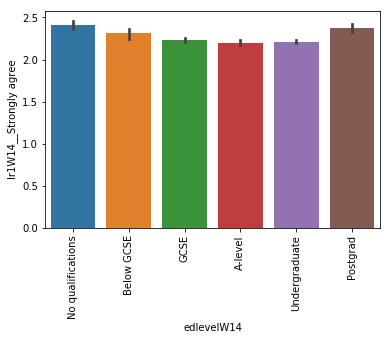

In [39]:
# sns.catplot(data=BES_Panel, x='edlevelW14', hue="profile_eurefvote");
# BES_reduced_with_na['al_scaleW14__Authoritarian']
sns.barplot(x=BES_Panel['edlevelW14'], y=BES_reduced_with_na['lr1W14__Strongly agree']);
plt.xticks(rotation=90);
# plt.savefig(output_subfolder +  os.sep + "newspapers_by_eurefVote" + ".png", bbox_inches='tight')

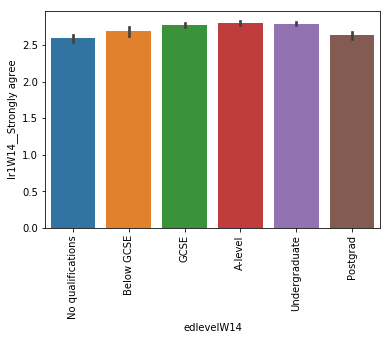

In [56]:
# sns.catplot(data=BES_Panel, x='edlevelW14', hue="profile_eurefvote");
# BES_reduced_with_na['al_scaleW14__Authoritarian']
sns.barplot(x=BES_Panel['edlevelW14'], y= 5-BES_reduced_with_na['lr1W14__Strongly agree'] );
plt.xticks(rotation=90);
# plt.savefig(output_subfolder +  os.sep + "newspapers_by_eurefVote" + ".png", bbox_inches='tight')

In [7]:
[x for x in BES_reduced_with_na.columns if "zeroSum" in x]

['zeroSum7W14__Strongly agree',
 'zeroSum11W14__Strongly agree',
 'zeroSum5W14__Strongly agree',
 'zeroSum9W14__Strongly agree',
 'zeroSum1W14__Strongly agree',
 'zeroSum4W14__Strongly agree',
 'zeroSumIRTW14']

In [12]:
BES_reduced_with_na.corrwith( BES_reduced_with_na['zeroSumIRTW14'] ).dropna().sort_values()

zeroSum7W14__Strongly agree                                                                                     -0.603319
zeroSum4W14__Strongly agree                                                                                     -0.501764
zeroSum1W14__Strongly agree                                                                                     -0.440771
successReduceInequalityNoneW12_Yes                                                                              -0.123332
overseasAidW14__Strongly agree                                                                                  -0.093181
auth4W14_Good manners                                                                                           -0.080721
ptvConExpW14__Very likely                                                                                       -0.074925
al2W14__Strongly agree                                                                                          -0.074840
euPriorityBalanceW14__Co

In [11]:
BES_reduced_with_na.corrwith( BES_reduced_with_na['zeroSum9W14__Strongly agree'] ).dropna().sort_values()

zeroSum7W14__Strongly agree                                                                                                                     -0.440321
auth1W14_Respect for elders                                                                                                                     -0.299483
auth3W14_To be well-behaved                                                                                                                     -0.217229
ptvConExpW14__Very likely                                                                                                                       -0.214663
ptvUKIPExpW14__Very likely                                                                                                                      -0.192618
dutyLongW11_Choice                                                                                                                              -0.160199
successReduceInequalityNoneW12_Yes                                          

In [13]:
BES_reduced_with_na.corrwith( BES_reduced_with_na['zeroSum4W14__Strongly agree'] ).dropna().sort_values()

zeroSumIRTW14                                                                                                                                   -0.501764
ptvGrnExpW14__Very likely                                                                                                                       -0.220542
ptvLabExpW14__Very likely                                                                                                                       -0.168716
ptvLDExpW14__Very likely                                                                                                                        -0.151686
zeroSum11W14__Strongly agree                                                                                                                    -0.130594
successReduceInequalityGrnW12_Yes                                                                                                               -0.119170
immigCulturalW14__Enriches cultural life                                    

In [14]:
BES_reduced_with_na.corrwith( BES_reduced_with_na['zeroSum1W14__Strongly agree'] ).dropna().sort_values()

zeroSumIRTW14                                                                                                                                   -0.440771
zeroSum9W14__Strongly agree                                                                                                                     -0.117433
zeroSum11W14__Strongly agree                                                                                                                    -0.101698
zeroSum5W14__Strongly agree                                                                                                                     -0.095595
successReduceInequalityGrnW12_Yes                                                                                                               -0.082717
motive1W11__Strongly agree                                                                                                                      -0.069327
motive2W11__Strongly agree                                                  